In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [2]:
def Hamiltonian_matrix_GOE(size):
    """
    working only in GOE casses (see lecture)
    """
    h = np.random.randn(size,size)
    return (h+h.T)/2

def Hamiltonian_matrix_GUE(size):
    """
    Working only in GUE casses (see lecture)
    
    z = a + b*i
    Re(z) = a
    Im(z) = b
    
    1j == i
    """
    x = np.random.randn(size,size)  # the Re(z)
    y = np.random.randn(size,size)  # the IM(z)
    h = x + 1j*y
    h_dagger = x.T - 1j*y.T
    return (h + h_dagger) / 2

def Find_eigenValues(matrix):
    eigenVal, eigenVectors = eig(matrix)
    return eigenVal.real #we know that energy is real not complex number

In [3]:
def Wigner_GOE(_s):
    return np.pi / 2 * _s * np.exp(- np.pi / 4 * _s**2)

def Wigner_GUE(_s):
    return 32 / np.pi**2 * _s**2 * np.exp(- 4 / np.pi * _s**2)

In [4]:
def cal_average(_list):
    average = 0
    Nums = len(_list)
    for i in range(0,Nums):
        average = average + _list[i] / Nums
    
    return average

"""
Now we want to compute the normalised energy spacing
"""
def normalised_spacing(energy_list):
    # list containg differences between elements
    diff = abs(np.diff(energy_list))
    # diff = np.diff(energy_list)
    # print(diff)
    # print()
    # compute average
    avr_spacing = cal_average(diff)
    
    nor_spacing = np.array([])
    for i in range(0, len(diff)):
        spacing = diff[i] / avr_spacing
        # append
        nor_spacing = np.append(nor_spacing, spacing)
        
    return nor_spacing

In [5]:
'''
little testing
'''

Gue_matrix = Hamiltonian_matrix_GUE(2)
print(Gue_matrix)

Gue_matrix_eigenVals = Find_eigenValues(Gue_matrix)
print('Eigenvalues of complex matrix:', Gue_matrix_eigenVals)

[[-0.71738739+0.j          0.30632275+0.83595597j]
 [ 0.30632275-0.83595597j  2.46753328+0.j        ]]
Eigenvalues of complex matrix: [-0.94936832  2.69951421]


# Set inital conditions: finding eigenvalues

In [6]:
N = 8 # N = 20, 200
nSamps = 100 # nSamps = 10000, 500

whole_eigenVals_goe = np.array([])
whole_eigenVals_gue = np.array([])

for i in range(0, nSamps):
    # randomise hamiltonian matrices
    h_goe = Hamiltonian_matrix_GOE(N)
    h_gue = Hamiltonian_matrix_GUE(N)
    # find eigenvalues
    eigenVals_goe = Find_eigenValues(h_goe)
    eigenVals_gue = Find_eigenValues(h_gue)
    # sorting
    eigenVals_goe = np.sort(eigenVals_goe)
    eigenVals_gue = np.sort(eigenVals_gue)
    # take only some 1/4 of them
    N_sel_goe = int(len(eigenVals_goe) / 4)
    N_mid_goe = int(len(eigenVals_goe) / 2)
    left_arg = int(N_mid_goe - N_sel_goe / 2)
    right_arg = int(N_mid_goe + N_sel_goe / 2)
    eVal_goe = np.array(eigenVals_goe[left_arg:right_arg])
    
    N_sel_gue = int(len(eigenVals_gue) / 4)
    N_mid_gue = int(len(eigenVals_gue) / 2)
    left_arg = int(N_mid_gue - N_sel_gue / 2)
    right_arg = int(N_mid_gue + N_sel_gue / 2)
    eVal_gue = np.array(eigenVals_gue[left_arg:right_arg])


    # appending to list cotains eigenvalues
    whole_eigenVals_goe = np.append(whole_eigenVals_goe, eVal_goe)
    # whole_eigenVals_goe = np.append(whole_eigenVals_goe, eigenVals_goe)
    whole_eigenVals_gue = np.append(whole_eigenVals_gue, eVal_gue)
    # whole_eigenVals_gue = np.append(whole_eigenVals_gue, eigenVals_gue)

# sorting
whole_eigenVals_goe = np.sort(whole_eigenVals_goe)
whole_eigenVals_gue = np.sort(whole_eigenVals_gue)

In [7]:
# print('whole_eigenVals_goe:', whole_eigenVals_goe)
# print()
# print('whole_eigenVals_gue:', whole_eigenVals_gue)

In [8]:
"""
Not in all of them we are interesting. We look for only for 1/4 of all
eigenvalues, which are in the middle.
"""

# N_sel_goe = int(len(whole_eigenVals_goe) / 4)
# N_mid_goe = int(len(whole_eigenVals_goe) / 2)
# left_arg = int(N_mid_goe - N_sel_goe / 2)
# right_arg = int(N_mid_goe + N_sel_goe / 2)
# print('left_arg:', left_arg, 'right_arg', right_arg)

# eVal_goe = np.array(whole_eigenVals_goe[left_arg:right_arg])
# # print('eVal_goe:', eVal_goe)
# print('len(eVal_goe):', len(eVal_goe))

# N_sel_gue = int(len(whole_eigenVals_gue) / 4)
# N_mid_gue = int(len(whole_eigenVals_gue) / 2)
# left_arg = int(N_mid_gue - N_sel_gue / 2)
# right_arg = int(N_mid_gue + N_sel_gue / 2)
# print('left_arg:', left_arg, 'right_arg', right_arg)


# eVal_gue = np.array(whole_eigenVals_gue[left_arg:right_arg])
# # print('eVal_gue:', eVal_gue)
# print('len(eVal_gue):', len(eVal_gue))

'\nNot in all of them we are interesting. We look for only for 1/4 of all\neigenvalues, which are in the middle.\n'

In [9]:
# goe
nor_spacing_goe = normalised_spacing(whole_eigenVals_goe)
# nor_spacing_goe = normalised_spacing(eVal_goe)

# gue
# nor_spacing_gue = normalised_spacing(eVal_gue)
nor_spacing_gue = normalised_spacing(whole_eigenVals_gue)

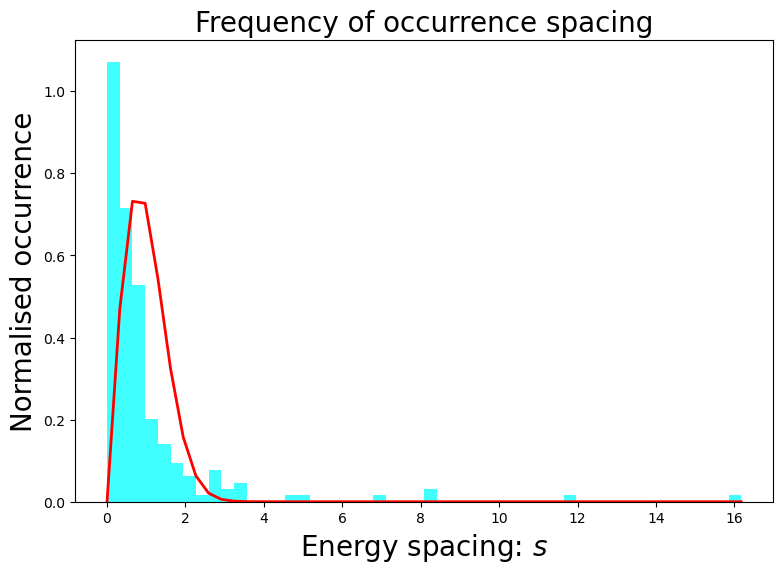

In [10]:
"""
Plotting histogram
"""

fig, ax = plt.subplots(figsize=(9.0, 6.0))
# data
n, bins, cos = plt.hist(nor_spacing_goe, 50, density=True, facecolor='cyan', alpha=0.75)
plt.plot(bins, Wigner_GOE(bins), 'r-', linewidth=2)
# describing
plt.title(r'Frequency of occurrence spacing', fontsize=20)
plt.ylabel('Normalised occurrence', fontsize=20)
plt.xlabel(r'Energy spacing: $s$', fontsize=20)
plt.show()

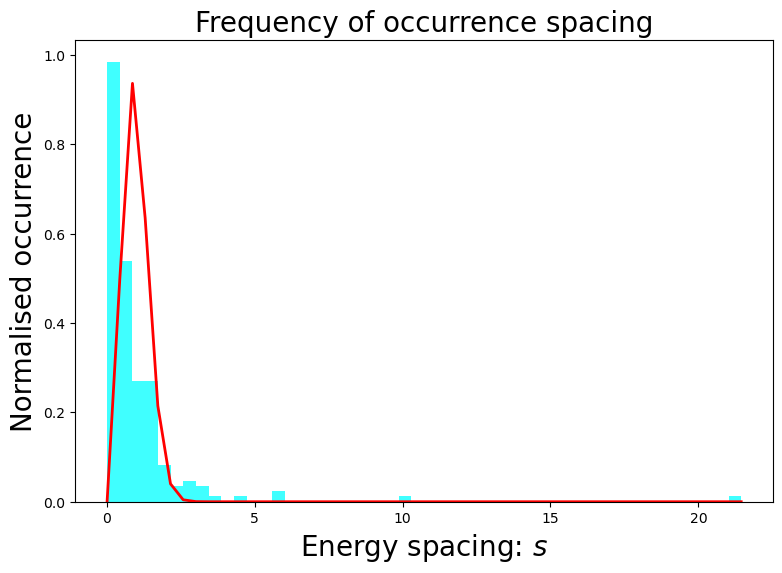

In [11]:
"""
Plotting histogram
"""

fig, ax = plt.subplots(figsize=(9.0, 6.0))
# data
n, bins, cos = plt.hist(nor_spacing_gue, 50, density=True, facecolor='cyan', alpha=0.75)
plt.plot(bins, Wigner_GUE(bins), 'r-', linewidth=2)
# describing
plt.title(r'Frequency of occurrence spacing', fontsize=20)
plt.ylabel('Normalised occurrence', fontsize=20)
plt.xlabel(r'Energy spacing: $s$', fontsize=20)
plt.show()